# 0. Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# 1. Acquire data

In [2]:
train_df= pd.read_csv('Data/Titanic/train.csv')
test_df= pd.read_csv('Data/Titanic/test.csv')
combine = [train_df, test_df]

# 2. Data Preprocessing

In [3]:
print(train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
349,350,0,3,"Dimic, Mr. Jovan",male,42.0,0,0,315088,8.6625,NaN,S
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S
465,466,0,3,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S
321,322,0,3,"Danoff, Mr. Yoto",male,27.0,0,0,349219,7.8958,NaN,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S


In [7]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [8]:
train_df.isnull().sum()/train_df.shape[0] *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

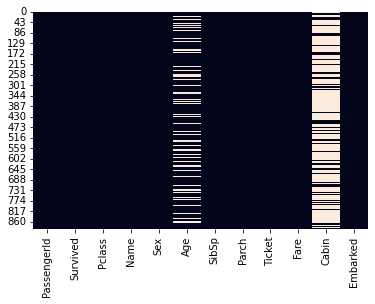

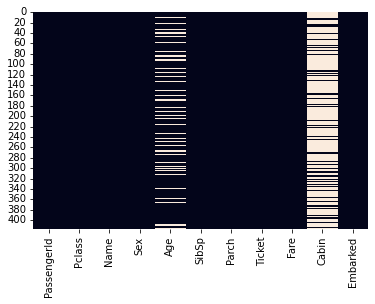

In [9]:
for df in combine:
    sns.heatmap(df.isnull(),cbar=False)
    plt.show()

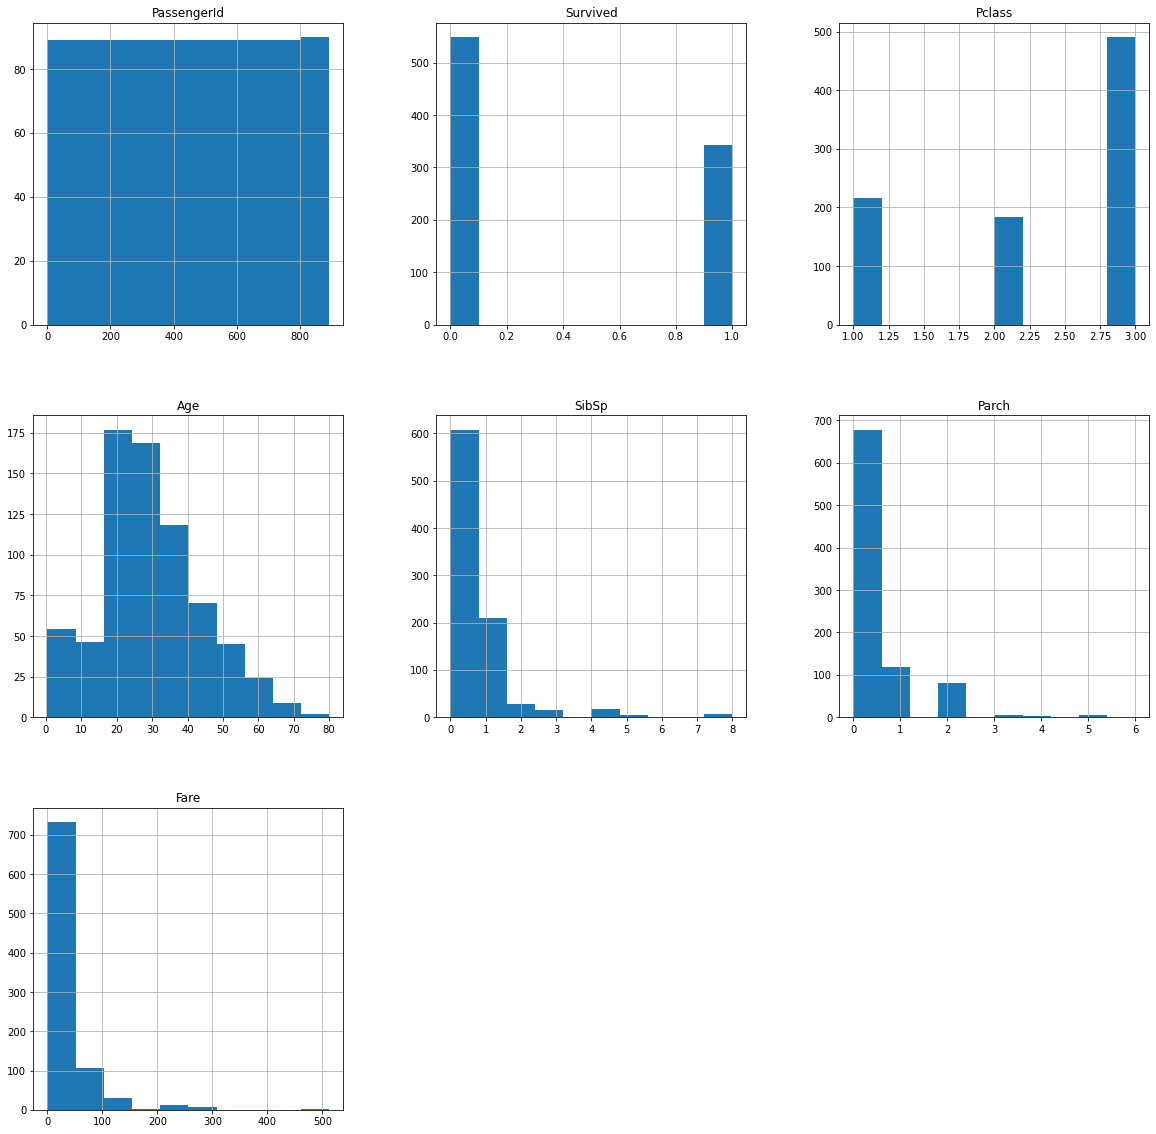

In [10]:
_=train_df.hist(figsize = (20,20))

In [11]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [12]:
train_df.describe(include=['O']).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [13]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values('Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values('Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train_df[['Age','Survived']].groupby(['Age'],as_index=False).mean().sort_values('Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [16]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values('Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values('Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


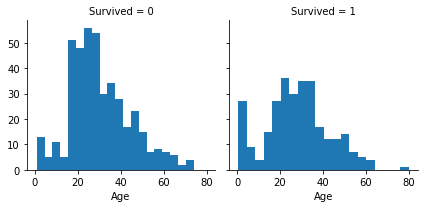

In [18]:
grid=sns.FacetGrid(train_df,col='Survived')
grid.map(plt.hist, 'Age', bins=20)
plt.show()

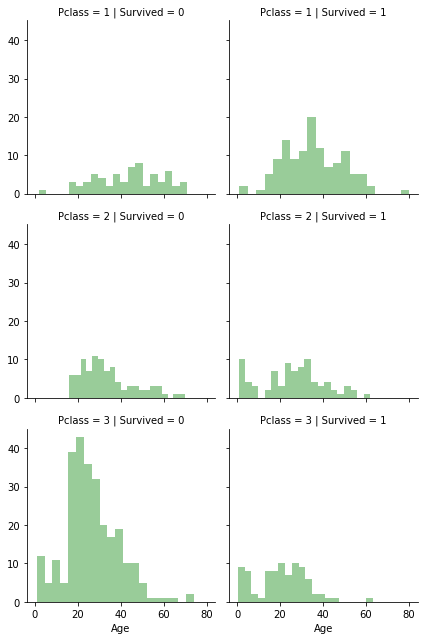

In [19]:
grid=sns.FacetGrid(train_df,col='Survived',row='Pclass')
grid.map(plt.hist, 'Age', bins=20,color='g',alpha=.4)
plt.show()

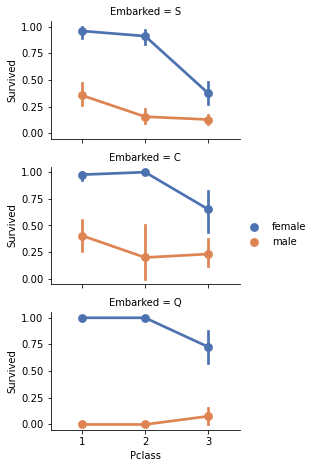

In [20]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep',order=[1,2,3],hue_order=['female', 'male'])
grid.add_legend()
plt.show()

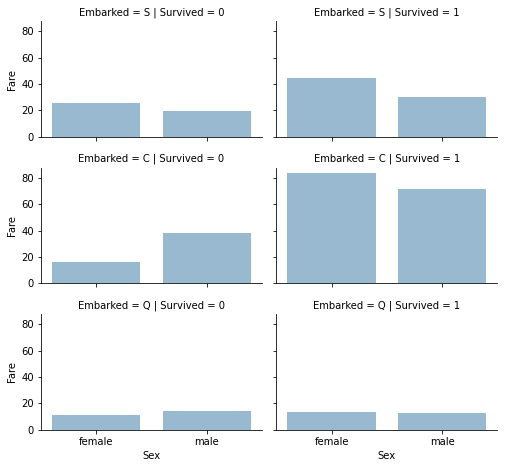

In [21]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None, order=['female', 'male'])
grid.add_legend()
plt.show()

# 3. Cleaning data

In [22]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [23]:
train_df[['Name']]

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [24]:
for df in combine:
    df['Title']=df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [25]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 
                                                 'Sir','Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values('Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [26]:
for df in combine:
    df['Title'] = df['Title'].replace({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Title            0
dtype: int64

In [27]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name','PassengerId'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 8))

In [28]:
for df in combine:
    df['Sex'] = df['Sex'].replace({'female':1, 'male':0})
    
train_df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
294,0,3,0,24.0,0,0,7.8958,S,1
80,0,3,0,22.0,0,0,9.0000,S,1
888,0,3,1,NaN,1,2,23.4500,S,2
487,0,1,0,58.0,0,0,29.7000,C,1
867,0,1,0,31.0,0,0,50.4958,S,1
158,0,3,0,NaN,0,0,8.6625,S,1
582,0,2,0,54.0,0,0,26.0000,S,1
709,1,3,0,NaN,1,1,15.2458,C,4
342,0,2,0,28.0,0,0,13.0000,S,1
538,0,3,0,NaN,0,0,14.5000,S,1


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


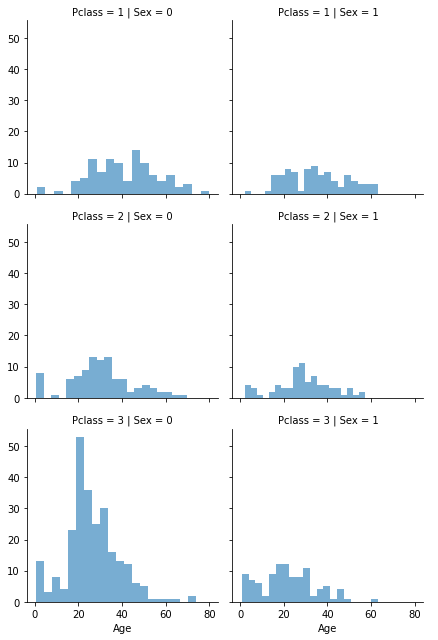

In [30]:
g= sns.FacetGrid(train_df,row = 'Pclass',col='Sex')
g.map(plt.hist,'Age',alpha=.6,bins=20)
g.add_legend()
plt.show()

In [31]:
guess_ages=np.zeros((2,3))

for df in combine:
    for i in range(2):
        for j in range(3):
            age_df= df[(df['Sex']==i)& (df['Pclass']==j+1)]['Age'].dropna()
            
            guess_ages[i,j] = age_df.median()
    for i in range(2):
        for j in range(3):
            df.loc[ (df['Age'].isnull()) & (df['Sex'] == i) & (df['Pclass'] == j+1)
                    ,'Age']= guess_ages[i,j]

    df['Age'] = df['Age'].astype(int)

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(1), int32(1), int64(6), object(1)
memory usage: 59.3+ KB


In [33]:
train_df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
160,0,3,0,44,0,1,16.10,S,1
308,0,2,0,30,1,0,24.00,C,1
241,1,3,1,21,1,0,15.50,Q,2
198,1,3,1,21,0,0,7.75,Q,2
84,1,2,1,17,0,0,10.50,S,2
284,0,1,0,40,0,0,26.00,S,1
637,0,2,0,31,1,1,26.25,S,1
595,0,3,0,36,1,1,24.15,S,1
863,0,3,1,21,8,2,69.55,S,2
660,1,1,0,50,2,0,133.65,S,5


In [34]:
train_df['bandAge']=pd.cut(train_df['Age'],5)
train_df[['bandAge','Survived']].groupby(['bandAge'],as_index=False).mean().sort_values(by='bandAge', ascending=True)

,bandAge,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [35]:
for df in combine :
    df.loc[df['Age']<=16,'Age']=0
    df.loc[df['Age']>16,'Age']=1
    df.loc[df['Age']>32,'Age']=2
    df.loc[df['Age']>48,'Age']=3
    df.loc[df['Age']>64,'Age']=4
train_df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,bandAge
58,1,2,1,0,1,2,27.7500,S,2,"(-0.08, 16.0]"
145,0,2,0,1,1,1,36.7500,S,1,"(16.0, 32.0]"
67,0,3,0,1,0,0,8.1583,S,1,"(16.0, 32.0]"
439,0,2,0,1,0,0,10.5000,S,1,"(16.0, 32.0]"
185,0,1,0,1,0,0,50.0000,S,1,"(32.0, 48.0]"
688,0,3,0,1,0,0,7.7958,S,1,"(16.0, 32.0]"
394,1,3,1,1,0,2,16.7000,S,3,"(16.0, 32.0]"
38,0,3,1,1,2,0,18.0000,S,2,"(16.0, 32.0]"
182,0,3,0,0,4,2,31.3875,S,4,"(-0.08, 16.0]"
257,1,1,1,1,0,0,86.5000,S,2,"(16.0, 32.0]"


In [36]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().\
        sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [37]:
for df in combine :
    df['IsAlone']=0
    df.loc[ df['FamilySize'] == 1 , 'IsAlone'] = 1
train_df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,bandAge,FamilySize,IsAlone
63,0,3,0,0,3,2,27.9000,S,4,"(-0.08, 16.0]",6,0
6,0,1,0,1,0,0,51.8625,S,1,"(48.0, 64.0]",1,1
256,1,1,1,1,0,0,79.2000,C,3,"(32.0, 48.0]",1,1
835,1,1,1,1,1,1,83.1583,C,2,"(32.0, 48.0]",3,0
199,0,2,1,1,0,0,13.0000,S,2,"(16.0, 32.0]",1,1
848,0,2,0,1,0,1,33.0000,S,5,"(16.0, 32.0]",2,0
346,1,2,1,1,0,0,13.0000,S,2,"(32.0, 48.0]",1,1
79,1,3,1,1,0,0,12.4750,S,2,"(16.0, 32.0]",1,1
500,0,3,0,1,0,0,8.6625,S,1,"(16.0, 32.0]",1,1
224,1,1,0,1,1,0,90.0000,S,1,"(32.0, 48.0]",2,0


In [38]:
train_df = train_df.drop(['bandAge','Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,1,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,1,53.1000,S,3,0
4,0,3,0,1,8.0500,S,1,1


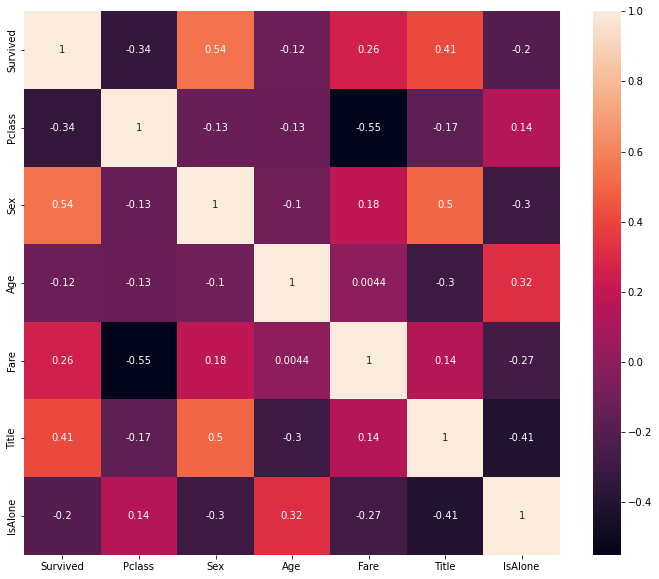

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(train_df.corr(),annot=True)
plt.show()

In [40]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,1,1,1
2,3,1,3
3,1,1,1
4,3,1,3
5,3,1,3
6,1,1,1
7,0,0,3
8,3,1,3
9,0,0,2


In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int64  
 3   Age        891 non-null    int32  
 4   Fare       891 non-null    float64
 5   Embarked   889 non-null    object 
 6   Title      891 non-null    int64  
 7   IsAlone    891 non-null    int64  
 8   Age*Class  891 non-null    int64  
dtypes: float64(1), int32(1), int64(6), object(1)
memory usage: 59.3+ KB


In [42]:
list(df['Embarked'].unique())

['Q', 'S', 'C']

In [43]:
for df in combine:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Embarked'] = df['Embarked'].map({'Q': 0, 'S': 1, 'C': 2} ).astype(int)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int64  
 3   Age        891 non-null    int32  
 4   Fare       891 non-null    float64
 5   Embarked   891 non-null    int32  
 6   Title      891 non-null    int64  
 7   IsAlone    891 non-null    int64  
 8   Age*Class  891 non-null    int64  
dtypes: float64(1), int32(2), int64(6)
memory usage: 55.8 KB


In [44]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,1,7.8292,0,1,1,3
1,3,1,1,7.0000,1,3,0,3
2,2,0,1,9.6875,0,1,1,2
3,3,0,1,8.6625,1,1,1,3
4,3,1,1,12.2875,1,3,0,3


In [45]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [46]:
for df in combine :
    df.loc[df['Fare']<=7.91,'Fare']=0
    df.loc[df['Fare']>7.91,'Fare']=1
    df.loc[df['Fare']>14.454,'Fare']=2
    df.loc[df['Fare']>31.0,'Fare']=3
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
train_df.sample(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
497,0,3,0,1,1.0,1,1,1,3
119,0,3,1,0,1.0,1,2,0,0
846,0,3,0,1,1.0,1,1,0,3
274,1,3,1,1,0.0,0,2,1,3
123,1,2,1,1,1.0,1,2,1,2
33,0,2,0,1,1.0,1,1,1,2
723,0,2,0,1,1.0,1,1,1,2
318,1,1,1,1,1.0,1,2,0,1
179,0,3,0,1,0.0,1,1,1,3
481,0,2,0,1,0.0,1,1,1,2


# 4. Training Logistic Regression Model

In [47]:
X_train=train_df.drop(['Survived'],axis=1)
y_train= train_df['Survived']
X_test=test_df.copy()
X_train.shape,y_train.shape,X_test.shape

((891, 8), (891,), (418, 8))

### Split The Data into Train/ Test Set

In [48]:

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                    test_size = 0.15,  random_state = 10123)
print("The train features shape is: ", X_train.shape)
print("The test features shape is: ", X_valid.shape)
print("The train target shape is: ", y_train.shape)
print("The test target shape is: ", y_valid.shape)

The train features shape is:  (757, 8)
The test features shape is:  (134, 8)
The train target shape is:  (757,)
The test target shape is:  (134,)


In [49]:
logReg =LogisticRegression()
logReg.fit(X_train,y_train)
y_pred_train=logReg.predict(X_train)
y_pred_valid=logReg.predict(X_valid)


In [50]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Coefficient"] = pd.Series(logReg.coef_[0])

coeff_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
1,Sex,2.272803
5,Title,0.320444
6,IsAlone,0.257527
4,Embarked,0.214324
7,Age*Class,0.095661
3,Fare,0.030412
2,Age,-0.848157
0,Pclass,-1.061592


In [51]:
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[386  75]
 [ 90 206]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       461
           1       0.73      0.70      0.71       296

    accuracy                           0.78       757
   macro avg       0.77      0.77      0.77       757
weighted avg       0.78      0.78      0.78       757



In [52]:
print(confusion_matrix(y_valid, y_pred_valid))
print(classification_report(y_valid, y_pred_valid))

[[76 12]
 [15 31]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        88
           1       0.72      0.67      0.70        46

    accuracy                           0.80       134
   macro avg       0.78      0.77      0.77       134
weighted avg       0.80      0.80      0.80       134



Text(0.5, 15.0, 'Predicted label')

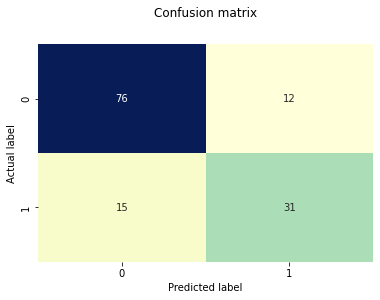

In [53]:
cm = confusion_matrix(y_valid, y_pred_valid)
_ = sns.heatmap(pd.DataFrame(cm),
                annot = True, 
                cmap = "YlGnBu",
                fmt = 'g',
                cbar = False)

plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
y_pred = logReg.predict(X_test)

In [55]:
df_pred = pd.DataFrame({
        "Survived": y_pred
    })
df_pred.head()

,Survived
0,0
1,1
2,0
3,0
4,1
